# Merging Data avec Pandas 

Dans la science de données on a souvent besoin de fusionner des tableaux. On peut le faire avec la fonction `merge()` qui prend comme paramètres deux `DataFrames` ainsi que les colonnes avec lesquelles réaliser les jointures. Cette méthode est très similaire à SQL sur le principe 🔭


### Importer pandas et les dataset `user_device.csv`, `user_usage.csv` et `android_devices.csv`

In [224]:
import pandas as pd

user_device_dataset = pd.read_csv('datasets/user_device.csv')
user_usage_dataset = pd.read_csv('datasets/user_usage.csv')
android_device_dataset = pd.read_csv('datasets/android_devices.csv')

### Importer les dataset & renommer la colonne `Branding` du dataset `android_devices.csv` en `Manufacturer`

In [307]:
android_device_dataset = android_device_dataset.rename(columns={'Retail Branding' : 'Manufacturer'})

### Afficher les dataset 

In [10]:
user_device_dataset

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


In [11]:
user_usage_dataset

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


In [12]:
android_device_dataset

,Manufacturer,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


### Votre premier merge

In [226]:
merge_device_usage_dataset = pd.merge(user_usage_dataset,
                                      user_device_dataset.iloc[:,[0,2,4]],
                                      left_on='use_id', right_on='use_id')

### Afficher la `shape` de vos dataset ainsi que celle du dataset de sortie 

Que remarquez vous ? 

In [227]:
print('user device: ' + str(user_device_dataset.shape))
print('user usage: ' + str(user_usage_dataset.shape))
print('android device: ' + str(android_device_dataset.shape))

user device: (272, 6)
user usage: (240, 4)
android device: (14546, 4)


### Afficher via `value_counts` les `use_id` présent dans le nouveau dataset ainsi que ceux non présent 

In [228]:
user_usage_dataset['use_id'].isin(merge_device_usage_dataset['use_id']).value_counts()

True     159
False     81
Name: use_id, dtype: int64

### Le left merge

Afficher la `shape` du dataset `user_usage`, celle du dataset de sortie ainsi que les valeurs manquantes. 

In [284]:
left_merge_device_usage_dataset = pd.merge(user_usage_dataset, 
             user_device_dataset.iloc[:,[0,2,4]],
             left_on='use_id', right_on='use_id', how='left')

print('user_usage dimensions: ' + str(user_usage_dataset.shape))
print('result dimensions: ' + str(left_merge_device_usage_dataset.shape))
missing_value = user_usage_dataset['use_id'].isin(user_device_dataset['use_id']).value_counts()[False]
print('There are {} missing values in the result.'.format(missing_value))

user_usage dimensions: (240, 4)
result dimensions: (240, 6)
There are 81 missing values in the result.


### Afficher votre dataset 

<AxesSubplot:>

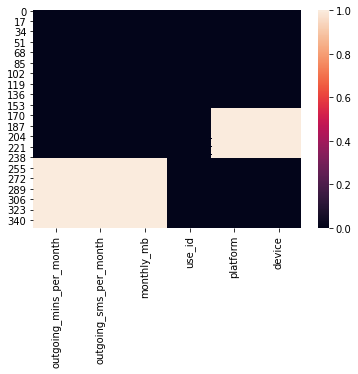

In [160]:
# Affichage heatmap des valeau NaN dans le merge
import seaborn as sns
sns.heatmap(left_merge_device_usage_dataset.isna())

In [165]:
# Affichage des 10 premières lignes du dataset
left_merge_device_usage_dataset.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


In [239]:
# Quantité totale de NaN dans le dataset mergé
left_merge_device_usage_dataset.isna().sum()

outgoing_mins_per_month     0
outgoing_sms_per_month      0
monthly_mb                  0
use_id                      0
platform                   81
device                     81
dtype: int64

In [182]:
# dtype de la colonne 'device'
left_merge_device_usage_dataset['device'].dtype

dtype('O')

In [241]:
# d => copy du dataset
# Ici, on remplace toutes les valeurs NaN des colonnes quantitatives par la médiane de la colonne
d = left_merge_device_usage_dataset.copy()
for col in d:
    # d.select_dtypes(include=['float64']) # Autre manière de capturer les bonnes colonnes
    if d[col].dtypes != 'O' and col != "use_id":
        d[col] = d[col].fillna(value=d[col].median())

d

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
235,260.66,68.44,896.96,25008,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN


In [250]:
# Autres façon de retirer les NaN
left_merge_device_usage_dataset.dropna()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
154,198.59,90.49,5191.12,23043,android,SM-G900F
155,198.59,90.49,3114.67,23044,android,SM-G900F
156,106.65,82.13,5191.12,23046,android,Moto G (4)
157,344.53,20.53,519.12,23049,android,SM-G900F


In [252]:
# Affichage des informations du dataset
left_merge_device_usage_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   outgoing_mins_per_month  240 non-null    float64
 1   outgoing_sms_per_month   240 non-null    float64
 2   monthly_mb               240 non-null    float64
 3   use_id                   240 non-null    int64  
 4   platform                 159 non-null    object 
 5   device                   159 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 13.1+ KB


### Le right merge

Afficher la `shape` du dataset `user_device`, celle du dataset de sortie ainsi que les valeurs manquantes des colonnes `monthly_mb` et `platform`. 

In [214]:
right_merge = pd.merge(user_usage_dataset, 
             user_device_dataset.iloc[:,[0,2,4]],
             left_on='use_id', right_on='use_id', how='right')

print('user_device: ' + str(user_device_dataset.shape))
print('right_merge: ' + str(right_merge.shape))

string = 'There are {} missing values in the {} column in the result.'
miss_value_month = right_merge['monthly_mb'].isna().sum()
miss_value_plat = right_merge['platform'].isna().sum()
print(string.format(miss_value_month, 'monthly_mb'))
print(string.format(miss_value_plat, 'platform'))

user_device: (272, 6)
right_merge: (272, 6)
There are 113 missing values in the monthly_mb column in the result.
There are 0 missing values in the platform column in the result.


### Le outer merge example

Afficher les valeurs unique de `use_id` des datasets `user_device` & `user_usage`, celle du dataset de sortie ainsi que les valeurs non manquantes. 

In [297]:
outer_merge = pd.merge(user_usage_dataset, 
             user_device_dataset.iloc[:,[0,2,4]],
             left_on='use_id', right_on='use_id', how='outer')

print('user_device: ' + str(user_device_dataset.shape))
print('outer_merge: ' + str(outer_merge.shape))
t = outer_merge.copy()
missing_values = user_usage_dataset['use_id'].isin(user_device_dataset['use_id']).value_counts()[True]
print('There are {} rows with no missing values'.format(missing_values))

user_device: (272, 6)
outer_merge: (353, 6)
There are 159 rows with no missing values


### Afficher les lignes `0,1,200,201,350,351`

In [298]:
outer_merge.iloc[[0, 1, 200, 201, 350, 351],[0,2,4]]

,outgoing_mins_per_month,monthly_mb,platform
0,21.97,1557.33,android
1,1710.08,7267.55,android
200,28.79,3114.67,NaN
201,616.56,5414.14,NaN
350,NaN,NaN,ios
351,NaN,NaN,ios


In [294]:
outer_merge.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


### Ajouter les colonnes `device` & `manufacturer`

In [318]:
result = user_usage_dataset.merge(user_device_dataset[['use_id', 'platform', 'device']], on="use_id", how="left")
result = result.merge(android_device_dataset[['Device', 'Manufacturer', 'Model']],
                      left_on='device', right_on='Model', how='left')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Device,Manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,jflte,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,herolte,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,herolte,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,coreprimevelte,Samsung,SM-G361F


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


### Afficher les `device` commencant par 'GT'

In [317]:
gt_series = android_device_dataset["Device"].str.startswith("GT", na = False) 
android_device_dataset[gt_series]

,Manufacturer,Marketing Name,Device,Model
1095,Bitmore,GTAB700,GTAB700,NID_7010
1096,Bitmore,GTAB900,GTAB900,S952
2402,Grundig,GTB1050,GTB1050,GTB 1050
2403,Grundig,GTB850,GTB850,GTB 850
2404,Grundig,TC69CA2,GTB801,GTB 801
...,...,...,...,...
10821,Samsung,Galaxy Y Pro,GT-B5510L,GT-B5510L
10822,Samsung,Galaxy Y Pro Duos,GT-B5512,GT-B5512
10823,Samsung,Galaxy Y Pro Duos,GT-B5512B,GT-B5512B
10824,Samsung,Galaxy Y TV,GT-S5367,GT-S5367


### Afficher le dataset des résultats 

In [311]:
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Device,Manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,jflte,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,herolte,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,herolte,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,coreprimevelte,Samsung,SM-G361F


### Grouper vos données par `manufacturer`
Compter les `use_id` et afficher les moyennes des colonnes `outgoing_mins_per_month`, `outgoing_sms_per_month`, `monthly_mb`

In [316]:
result.groupby(by='Manufacturer').agg({'use_id' : 'count',
                                       'outgoing_mins_per_month': 'mean',
                                       'outgoing_sms_per_month': 'mean',
                                       'monthly_mb': 'mean'})

,use_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
Manufacturer,,,,
HTC,44,299.842955,93.059318,5144.077955
Huawei,3,81.526667,9.500000,1561.226667
LGE,2,111.530000,12.760000,1557.330000
Lava,2,60.650000,261.900000,12458.670000
Lenovo,2,215.920000,12.930000,1557.330000
Motorola,16,95.127500,65.666250,3946.500000
OnePlus,6,354.855000,48.330000,6575.410000
Samsung,108,191.010093,92.390463,4017.318889
Sony,16,177.315625,40.176250,3212.000625
